In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import datasets


In [ ]:
# We can load available datasets using iPython's tab-completion functionality.
# 
# datasets.load_<tab>

### Wine Data Set

#### Load data set

In [2]:
wine = datasets.load_wine()

#### Data Keys

In [23]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

#### Description

In [8]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

#### Name of Classes

In [10]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


#### Name of Features

In [11]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


#### Data and Labeled Data

In [9]:
data = wine.data
labelled_data = wine.target

### Scatter plot of the features ash and color_intensity

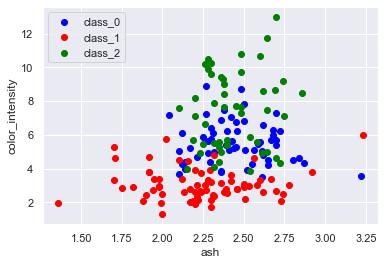

In [15]:
features = 'ash', 'color_intensity'
features_index = [wine.feature_names.index(features[0]),
                  wine.feature_names.index(features[1])]
                  
colors = ['blue', 'red', 'green']

for label, color in zip(range(len(wine.target_names)), colors):
    plt.scatter(wine.data[wine.target==label, features_index[0]], 
                wine.data[wine.target==label, features_index[1]],
                label=wine.target_names[label],
                c=color)

plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend(loc='upper left')
plt.show() # wine dataset scatter plot

### Scatter Matrix of Features

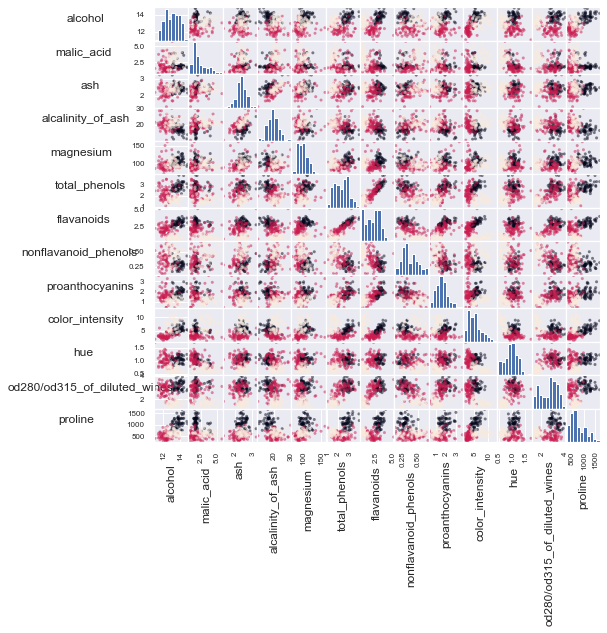

In [18]:
def rotate_labels(df, axes):
    """ changing the rotation of the label output, 
    y labels horizontal and x labels vertical """
    n = len(df.columns)
    for x in range(n):
        for y in range(n):
            # to get the axis of subplots
            ax = axs[x, y]
            # to make x axis name vertical  
            ax.xaxis.label.set_rotation(90)
            # to make y axis name horizontal 
            ax.yaxis.label.set_rotation(0)
            # to make sure y axis names are outside the plot area
            ax.yaxis.labelpad = 50

wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
axs = pd.plotting.scatter_matrix(wine_df, 
                                 c=wine.target, 
                                 figsize=(8, 8),
                                );

rotate_labels(wine_df, axs)